### Оптимизация гиперпараметров

#### Цель работы

Познакомиться с оптимизацией гиперпараметров

#### Содержание работы

1. Сгенерировать датасет для задачи бинарной классификации с использованием функции make_classification.
2. Построить и оценить качество различных моделей классификации, используя метрики accuracy и F1-score.
5. Построить модель elasticnet на данных прогнозирования продаж.
6. Оптимизировать гиперпараметры данной модели с помощью поиска по сетке.

#### Методические указания

##### Простой выбор модели

Загрузим необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Сгенерируем матрицу признаков и вектор целей для задачи классификации. Для этого воспользуемся библиотечной функцией make_classification, которая генерирует случайное распределение по заданным параметрам. Число генерируемых точек данных зададим равным 1000, количество признаков - 5. Классов у нас  будет два.

In [2]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

Выведем количественные параметры датаета:

In [3]:
X.shape, Y.shape

((1000, 5), (1000,))

В датасете описаны 1000 объектов и у каждого есть 5 признаков.

Разделим данные на обучающую и тестовую части:

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Выведем количественные параметры тестовой и обучающей выборки:

In [5]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [6]:
X_test.shape, Y_test.shape

((200, 5), (200,))

Можем приступать к созданию и обучению модели. Импортируем нужные объекты из библиотеки scikit-learn. В данном случае мы будем импортировать модели классифиции.

In [7]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

Построение различных моделей классификации

In [8]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

Необходимо сравнить модели друг с другом и выбрать наиболее точные. Обучим модель, примените модель к тестовым данным и запишите показатели точности.

In [9]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Анализ производительности модели

In [10]:
import pandas as pd
import seaborn as sns

Сформируем DataFrame для наглядного отображения показателя точности

In [11]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

,name,score
9,Neural_Net,0.860
6,Decision_Tree,0.855
4,Gaussian_Process,0.850
8,Random_Forest,0.850
11,Naive_Bayes,0.845
0,Nearest_Neighbors,0.840
7,Extra_Trees,0.840
1,Linear_SVM,0.835
12,QDA,0.835
5,Gradient_Boosting,0.830


Добавление цветов во фрейм данных

In [12]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
9,Neural_Net,0.860000
6,Decision_Tree,0.855000
4,Gaussian_Process,0.850000
8,Random_Forest,0.850000
11,Naive_Bayes,0.845000
0,Nearest_Neighbors,0.840000
7,Extra_Trees,0.840000
1,Linear_SVM,0.835000
12,QDA,0.835000
5,Gradient_Boosting,0.830000


Мы также можем создать график результатов оценки модели и сравнить расхождение средней точность каждой модели. 
Так же для визуализации можно использовать sns.set

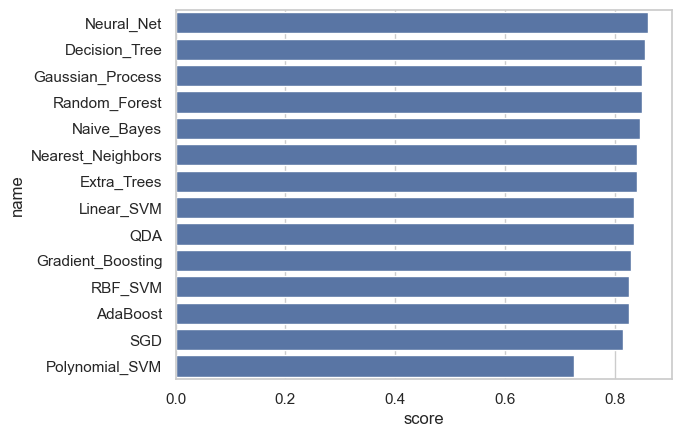

In [13]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

Рассмотрим как мы можем оптимизировать методы. Для этого выберем метод Grid Search. И раасмотрим пример на основе данных затрат на рекламу.

Рассмотрим реализацию для оптимизации производительности метода машинного обучения с помощью Grid Search.

Настройка гиперпараметров важна для правильной работы моделей машинного обучения (ML). Grid Search, является базовым методом для оптимизации гиперпараметров. Данный метод рассматривает некоторые комбинации гиперпараметров и выбирает ту, которая дает более низкий балл ошибки.

##### Поиск по сетке

Мы можем перебирать комбинации гиперпараметров с помощью поиска по сетке (grid). Линейные модели достаточно просты, и у них даже есть свои специализированные версии поиска значений параметров. Но также можно использовать обобщённый метод поиска по сетке - grid search. Этот метод применим для *любой* модели в sklearn, и он пригодится нам позже для более сложных моделей.

Мы будем использовать данные из книги ISLR (Introduction to Statistical Learning: With Applications in R). Это будут продажи определённого продукта (в тысячах единиц), как функция от бюджета рекламы на ТВ, радио и в газетах (в тысячах долларов). Наша задача исследовать на сколько реклама влияет на продажу товаров. Если мы выясним что никакой связи нет, то тогда не стоит тратить деньги на рекламу. Мы хотели бы увидеть чем больше тратится денег на рекламу тем больше продаются товары.

In [14]:
df = pd.read_csv("Advertising.csv")

Посмотрим на данные, видим кол-во денег, потраченное на рекламу, отдельно на TV, radio, newspaper, за некоторый период времени, например за неделю. Sales объем продаж товаров, за тот же самый период времени.

In [15]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Далее разобьем данные на признаки и целевую переменную. Признаки это все колонки кроме целевой переменной, один из способов быстро получить все эти колонки df.drop('sales',axis=1). Все признаки измеряются в одних и тех же единицах измерения.

Библиотека Python sklearn предлагает нам функцию StandardScaler() для стандартизации значений данных в стандартный формат. В соответствии с приведенным ниже синтаксисом мы изначально создаем объект функции StandardScaler(). Далее используем fit_transform() вместе с присвоенным объектом для преобразования данных и их стандартизации.

In [16]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ElasticNet это популярный тип регуляризованной линейной регрессии, который сочетает в себе два популярных штрафа, а именно штрафные функции L1 и L2.

В модели ElasticNet есть два парамера L1_ratio он задает соотношение между Lasso регрессией и Ridg регрессией, второй параметр alfa - отвечает за то на сколько сильно мы применяем штрафное слагаемое для регуляризации. Задача состоит в том что бы найти такие параметры alfa и L1_ratio которые будут оптимальными.

In [17]:
from sklearn.linear_model import ElasticNet

In [18]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |
 |  Minimizes the objective function::
 |
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |
 |  where::
 |
 |          alpha = a + b and l1_ratio = a / (a + b)
 |
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alpha corresponds to

Значения гиперпараметров будем искать используя готовый класс Grid SearchCV.

Этот поиск состоит из следующих составляющих:

* функция оценки - estimator (рregressor или classifier, например sklearn.svm.SVC());
* пространство параметров;
* метод поиска или сэмплирования кандидатов;
* схема кросс-валидации
* функция оценки (score function).

Cоздадим экземпляр модели ElasticNet() со значениями по умолчанию.

In [19]:
base_elastic_model = ElasticNet()

Создаем переменную param_grid это будет словарь в котором укажем возможные значения гиперпараметров которые хотим исследовать

In [20]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

Мы создали сетку с возможными значениями гиперпараметров.

Далее выполним поиск по сетке, для этого импортируем GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

Укажем параметры для GridSearchCV. Существуют следующие параметры estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [22]:
# число verbose выбирайте сами
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

Следубщий шаг обучить модель с помощью метода fit, подаем на вход обучающий набор данных. Метод fit пройдет в цикле по всем комбинациям гиперпараметров, для каждой комбинации гиперпарамеиров выполнит кросс валидацию с разбиение данных на k частей, выберет наилучшие значения гиперпараметров по указанной сетрике а именно neg_mean_squared_error и вернет на выходе обученную модель

In [23]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

Посмотреть какая модель получилась наилучшая:

In [24]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [25]:
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
               max_iter=1000, positive=False, precompute=False,
               random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, l1_ratio=1)

Видим ElasticNet с параметрами. Это наилучшая комбинация гиперпараметров

Если параметры нас устраивают переходим к созданию модели

In [26]:
y_pred = grid_model.predict(X_test)

И вычисляем метрики

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse_res = mean_squared_error(y_test,y_pred)
mse_res

2.3873426420874737

Получили финальную оценку работы нашей модели

#### Контрольные вопросы
1. Зачем нужно производить оптимизацию гиперпараметров?
2. В чём заключается процесс оптимизации гиперпараметров?
3. В чем достоинства и недостатки метода gridsearchcv?
4. Какие еще стратегии оптимизации гиперпараметров существуют?
5. Почему при использовании GridSearchCV не нужна валидационная выборка?

#### Дополнительные задания

1. При выборе модели мы обычно выбираем ту, которая дает наибольшее значение какой-то метрики. Но это означает, что эта оценка метрики уже становится завышенной. Поэтому для объективной оценки качества модели ее опять следует оценить на новом наборе данных. Поэтому для выбора модели нужно разделить выборку на три части - обучающую, валидационную и тестовую. Повторите первую часть работы, но с таким разбиением и получите несмещенную оценку качества наилучшей модели.
2. Оптимизируйте гиперпараметры той же модели, но другим методом - случайным поиском. Сравните полученные результаты.
3. Во второй задаче найдите наиболее эффективный класс моделей, а затем оптимизируйте гиперпараметры у этой модели. Сравните, насколько лучше получилась модель.

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')

# Генерируем данные
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, n_redundant=0, random_state=1)

# Разбивка на 60% - обучение, 20% - валидация, 20% - тест
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25*0.8 = 0.2

print("Shapes:")
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

# Список моделей
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")
]

# Обучение моделей на обучающем наборе и оценка на валидации
val_scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_val, y_val)
    val_scores.append(score)
    
df_val = pd.DataFrame({"Model": names, "Validation_Accuracy": val_scores})
df_val = df_val.sort_values(by="Validation_Accuracy", ascending=False)
print("\nОценка моделей на валидационной выборке:")
display(df_val)

# Выбираем лучшую модель (например, с наивысшей точностью)
best_model_name = df_val.iloc[0]["Model"]
best_model_index = names.index(best_model_name)
best_model = classifiers[best_model_index]
print("\nЛучшая модель на валидационной выборке:", best_model_name)

# Переобучаем лучшую модель на объединении обучающей и валидационной выборок
import numpy as np
X_train_full = np.concatenate([X_train, X_val])
y_train_full = np.concatenate([y_train, y_val])
best_model.fit(X_train_full, y_train_full)

# Итоговая оценка на тестовой выборке
test_score = best_model.score(X_test, y_test)
print("\nТочность лучшей модели на тестовой выборке:", test_score)


Shapes:
Train: (600, 5) (600,)
Validation: (200, 5) (200,)
Test: (200, 5) (200,)

Оценка моделей на валидационной выборке:


,Model,Validation_Accuracy
9,Neural_Net,0.865
4,Gaussian_Process,0.845
2,Polynomial_SVM,0.840
8,Random_Forest,0.840
12,QDA,0.840
1,Linear_SVM,0.835
5,Gradient_Boosting,0.835
6,Decision_Tree,0.835
11,Naive_Bayes,0.835
0,Nearest_Neighbors,0.830



Лучшая модель на валидационной выборке: Neural_Net

Точность лучшей модели на тестовой выборке: 0.875


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np

# Читаем данные 
df = pd.read_csv("Advertising.csv")

# Формирование признаков и целевой переменной
X = df.drop('sales', axis=1)
y = df['sales']

# Разбивка данных 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Базовая модель ElasticNet
base_elastic_model = ElasticNet()

# Задаем пространство гиперпараметров
param_dist = {
    'alpha': [0.05, 0.1, 1, 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
}

# Используем RandomizedSearchCV с 5-кратной кросс-валидацией
random_search = RandomizedSearchCV(estimator=base_elastic_model,
                                   param_distributions=param_dist,
                                   n_iter=20,  # число случайных комбинаций
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   verbose=0,
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)
print("\nЛучшие параметры, найденные RandomizedSearchCV:")
print(random_search.best_params_)

# Оценка модели
y_pred_rand = random_search.predict(X_test_scaled)
mse_rand = mean_squared_error(y_test, y_pred_rand)
print("\nMSE модели с RandomizedSearchCV:", mse_rand)
print("\nMSE модели с GridSearchCV:", mse_res)


Лучшие параметры, найденные RandomizedSearchCV:
{'l1_ratio': 1, 'alpha': 0.1}

MSE модели с RandomizedSearchCV: 2.3873426420874737

MSE модели с GridSearchCV: 2.3873426420874737


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Чтение данных
df = pd.read_csv("Advertising.csv")
X = df.drop('sales', axis=1)
y = df['sales']

# Разбивка данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Определяем список моделей
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(max_depth=5),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=101),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, random_state=101)
}

# Оценка моделей с помощью кросс-валидации
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    results[name] = np.mean(np.abs(scores))
    
print("\nСреднее значение MSE (по 5-кратной кросс-валидации) для моделей:")
for name, mse in results.items():
    print(f"{name}: {mse:.3f}")


Среднее значение MSE (по 5-кратной кросс-валидации) для моделей:
LinearRegression: 3.344
Ridge: 3.345
Lasso: 5.254
ElasticNet: 7.436
DecisionTree: 2.026
RandomForest: 1.045
GradientBoosting: 3.236


In [32]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest regressor.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=Tru

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Определяем пространство гиперпараметров для RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50, 100, 200, 400],
    'criterion' : ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_depth': [5, 7, 10]
}

rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              scoring='neg_mean_squared_error',
                              cv=5,
                              verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

print("\nЛучшие параметры для RandomForestRegressor:")
print(grid_search_rf.best_params_)

# Оценка оптимизированной модели
best_gb = grid_search_rf.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)
mse_optimized = mean_squared_error(y_test, y_pred_gb)
print("\nMSE оптимизированной модели:", mse_optimized)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=squared_error, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END criterion=

In [41]:
# Стандартная модель без оптимизации
rf_default = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=101)
res = cross_val_score(rf_default, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nMSE стандартной модели RandomForestRegressor:", np.abs(res).mean())


MSE стандартной модели RandomForestRegressor: 1.0449072319324153
